In [1]:
import sqlite3 as sq

In [2]:
connect= sq.connect('movies.db')

In [3]:
cursor = connect.cursor()

In [4]:
cursor.execute('''create table sample (name text, aantal int)''')

In [5]:
waardes = ('AI',47)
cursor.execute('''insert into sample values (?,?)''', waardes)

In [6]:
cursor.execute('''select * from sample''')
res = cursor.fetchall()
print(res)

[('AI', 47)]


In [7]:
waardes =(
(2021,'Ocak - January','13.4'),
(2021,'Şubat - February','14.1'),
(2021,'Mart - March','13.1'),
(2021,'Nisan - April','12.9'),
(2021,'Mayıs - May','12.4'),
(2021,'Haziran - June','10.4'),
(2021,'Temmuz - July','12.1'),
(2021,'Ağustos - August','12.0'),
(2021,'Eylül - September','11.1'),
(2021,'Ekim - October','10.7'),
(2021,'Kasım - November','10.9'),
(2021,'Aralık - December','11.3')
 )
cursor.execute('''drop table if exists issizlik''')
cursor.execute('''create table issizlik (yil text, ay text, oran real)''')

In [8]:
cursor.executemany('''insert into issizlik values (?,?,?)''',waardes)

In [9]:
cursor.execute('''select * from issizlik''')
res = cursor.fetchall()
print(res)
l = list(res)

[('2021', 'Ocak - January', 13.4), ('2021', 'Şubat - February', 14.1), ('2021', 'Mart - March', 13.1), ('2021', 'Nisan - April', 12.9), ('2021', 'Mayıs - May', 12.4), ('2021', 'Haziran - June', 10.4), ('2021', 'Temmuz - July', 12.1), ('2021', 'Ağustos - August', 12.0), ('2021', 'Eylül - September', 11.1), ('2021', 'Ekim - October', 10.7), ('2021', 'Kasım - November', 10.9), ('2021', 'Aralık - December', 11.3)]


[('2021', 'Ocak - January', 13.4), ('2021', 'Şubat - February', 14.1), ('2021', 'Mart - March', 13.1), ('2021', 'Nisan - April', 12.9), ('2021', 'Mayıs - May', 12.4), ('2021', 'Haziran - June', 10.4), ('2021', 'Temmuz - July', 12.1), ('2021', 'Ağustos - August', 12.0), ('2021', 'Eylül - September', 11.1), ('2021', 'Ekim - October', 10.7), ('2021', 'Kasım - November', 10.9), ('2021', 'Aralık - December', 11.3)]


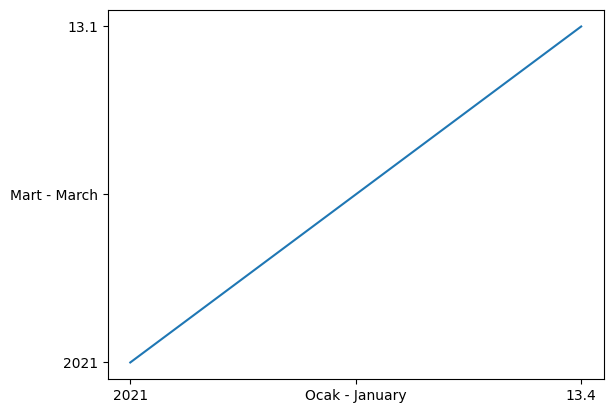

In [10]:
print(l)
import matplotlib.pyplot as plt 

plt.plot(l[0],l[2])

In [95]:
import pandas as pd
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_by_birth_rate")
countries = tables[0]
countries.head()

,Country/territory,WB 2018 (Rate ‰),OECD 2011 (Rate ‰),CIA WF 2013 (Rate ‰),CIA WF 2014 (Rate ‰),CIA WF 2020 (Rate ‰),PRB 2022 (Rate ‰)
,Country/territory,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1
0,Afghanistan,32.0,45.1,39.05,38.84,36.7,36.0
1,Albania,12.0,11.5,12.57,12.73,13.0,10.0
2,Algeria,24.0,24.8,24.25,23.99,20.0,22.0
3,Andorra,7.0,10.2,8.88,8.48,7.0,6.0
4,Angola,41.0,40.9,39.16,38.97,42.7,39.0


In [57]:
countries = countries.rename(columns={"Country/territory": 'country', "PRB 2022 (Rate ‰)": 'prb'})

In [91]:
countries['prb'] > 40
countries.loc[(countries['prb'] > 40).values,['country']]

,country
,country
32,Central African Republic
33,Chad
38,Congo DR
107,Mali
127,Niger
160,Somalia


In [48]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   (Country/territory, Country/territory)      238 non-null    object 
 1   (WB 2018 (Rate ‰), Unnamed: 1_level_1)      206 non-null    float64
 2   (OECD 2011 (Rate ‰), Unnamed: 2_level_1)    233 non-null    float64
 3   (CIA WF 2013 (Rate ‰), Unnamed: 3_level_1)  225 non-null    float64
 4   (CIA WF 2014 (Rate ‰), Unnamed: 4_level_1)  225 non-null    float64
 5   (CIA WF 2020 (Rate ‰), Unnamed: 5_level_1)  229 non-null    float64
 6   (PRB 2022 (Rate ‰), Unnamed: 6_level_1)     202 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.1+ KB


In [5]:
countries.describe()

,WB 2018 (Rate ‰),OECD 2011 (Rate ‰),CIA WF 2013 (Rate ‰),CIA WF 2014 (Rate ‰),CIA WF 2020 (Rate ‰),PRB 2022 (Rate ‰)
,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1
count,206.000000,233.000000,225.000000,225.000000,229.000000,202.000000
mean,19.786408,20.433820,19.862444,19.665111,18.447598,19.158416
std,9.811562,10.171366,9.789472,9.640117,9.324574,9.842271
min,6.000000,7.300000,6.790000,6.720000,6.400000,5.000000
25%,11.000000,11.900000,11.720000,11.870000,11.400000,11.000000
50%,18.000000,17.400000,17.170000,16.900000,15.400000,17.000000
75%,27.000000,27.500000,25.400000,24.890000,23.100000,27.000000
max,46.000000,46.000000,46.840000,46.120000,47.500000,45.000000
